# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- sklearn [link](https://scikit-learn.org/)
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q3.ipynb`.


## Question 3
Fake news is a widespread problem and there are many methods for combating it.
You have to build a fake news detection system using a ML model. Train any ML model (ANN, LSTM) over the given Dataset.
The dataset has short statements spoken by people and has the meta-information and corresponding label for those sentences. 
Your target is label column which has 6 labels(in the increasing order of truthfullness): pants-fire, false, barely-true, half-true, mostly-true, true.

The features are 'statement', 'subject', 'speaker', 'job', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'venue' and the target is column "label".

The statement is made by speaker whose job, party are given along with 6 columns which are an account of the  type of news(labels) the person has shared before. 
The person who has shared fake content before is likely to share it in future and this can be accounted by the ML model as a feature. Column barely_true_c contains how many barely_true news has the speaker shared (and so is with column X_c, value of X_c is number of X the person shared).


You have to perform two tasks:
* task1: Binary classification <br>
Classify the given news as true/false. Take the labels pants-fire, false, barely-true as false and rest (half-true, mostly-true, true) as true.
* task2: Six-way classification <br>
Classify the given news into six-classes "pants-fire, false, barely-true, half-true, mostly-true, true".

For each of the tasks:
1) Experiment with depth of network and try to fine-tune hyperparameters reporting your observations. <br>
2) Report the accuracy, f1-score, confusion matrix on train, val and test sets. <br>
3) Experiment with bag-of-words, glove and bert embeddings(code given in the below notebook) and report results. <br> Comment on what is the affect of embedding on the results.

The pre-processing code is provided, you need to write the training and test.

Note: You are supposed to train on trainset, fine-tune on val and just eval on test set. If found that you trained on val/test sets, the penalty will be incurred.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install numpy
# !pip install tensorflow
# !pip install re
# !pip install nltk
# !pip install keras
# !pip install sklearn

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from tensorflow import keras  #feel free to use any other library
import numpy as np

import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils import np_utils


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/q3_data/train.csv')
val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/q3_data/val.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/q3_data/test.csv')

In [4]:
# Dropping the 'id' column
train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)
val.drop('id', axis = 1, inplace = True)

In [5]:
train.head(5)

,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN


In [6]:
# Checking the shape of data
print(train.shape)
print(val.shape)
print(test.shape)

(10269, 13)
(1284, 13)
(1283, 13)


## Clean and pre-process data
* Replace missing values
* Remove numbers and special characters
* Convert to upper-case

We experiment with two types of processing, one directly appending the other attributes like subject, job, state, party to sentence and then applying bag of words on it.

Other being encoding sentence with glove embeddings and passing just that.

In [7]:
def dataPreprocessing(data):
    '''Function for cleaning the dataset
    '''
    corpus = []
    # Missing values
    data["job"].fillna("no-job", inplace = True)
    data["state"].fillna("no-state", inplace = True)

    for x in range(data.shape[0]):
        statement = re.sub('[^a-zA-Z]', ' ', data['statement'][x]) # Removing all numbers and special characters
        statement = statement.lower() # Converting uppercase to lowercase
        statement = statement.split()
        
        # you can experiment with any other stemmers
        ps = PorterStemmer()
        statement = [ps.stem(word) for word in statement if not word in set(stopwords.words('english'))] # Stemming the dataset and removing stopwords
        statement = ' '.join(statement)
        subject = data['subject'][x].replace(',', ' ')
        speaker = data['speaker'][x]
        job = data['job'][x].lower()
        # job = job.replace(' ', '-')
        state = data['state'][x].lower()
        party = data['party'][x].lower()
        corpus.append(statement + ' '  + subject + ' ' + job + ' ' + state + ' ' + party)
    return corpus

In [8]:
x_train = dataPreprocessing(train)
x_val = dataPreprocessing(val) 
x_test = dataPreprocessing(test) 

In [9]:
len(x_train), len(x_val), len(x_test)

(10269, 1284, 1283)

In [10]:
corpus = x_train + x_val + x_test

## Using bag-of-words embedding


In [ ]:
# Converting the corpus into bag-of-words
cv = CountVectorizer(max_features = 8000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(12836, 8000)

In [ ]:
train.columns

Index(['label', 'statement', 'subject', 'speaker', 'job', 'state', 'party',
       'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c',
       'pants_on_fire_c', 'venue'],
      dtype='object')

In [23]:
# Selecting the columns 'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c'
label_cols = ['barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c',
       'pants_on_fire_c']
x_train2 = train[label_cols]
x_val2 = val[label_cols]
x_test2 = test[label_cols]

In [ ]:
# Stacking x_train and x_train2 horizontally
x_train_bow = np.hstack((X[:len(x_train)], x_train2))
x_val_bow = np.hstack((X[len(x_train):len(x_train)+len(x_val)], x_val2))
x_test_bow = np.hstack((X[len(x_train)+len(x_val):], x_test2))

In [ ]:
x_train_bow.shape

(10269, 8005)

## Use of Glove Embedding


download glove embeddings from 'https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip'
and place in your current working folder


In [ ]:
#!unzip "glove.6B.zip" -d "glove"

In [11]:
emmbed_dict = {}
with open('/content/drive/MyDrive/Colab Notebooks/Assignments/glove.6B/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector


In [12]:
emmbed_dict['oov'] = np.zeros(200)

In [ ]:
!pip install sentence-transformers

In [14]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [15]:
from keras.preprocessing.sequence import pad_sequences

In [16]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def dataPreprocessing_glove(data):
    corpus = []
    # Missing values
    data["job"].fillna("no-job", inplace = True)
    data["state"].fillna("no-state", inplace = True)

    for x in range(data.shape[0]):
        statement = re.sub('[^a-zA-Z]', ' ', data['statement'][x]) # Removing all numbers and special characters
        statement = statement.lower() # Converting uppercase to lowercase
        statement = word_tokenize(statement)

        embed_statement = []
        for w in statement:
            if w in emmbed_dict:
                embed_statement.append(emmbed_dict[w])
            else:
                embed_statement.append(emmbed_dict['oov'])
         
        # bonus: Think how you can encode the below features(hint: look upon label encoding or training your own word2vec or any other embedding model)
    
#         subject = data['subject'][x].replace(',', ' ')
#         speaker = data['speaker'][x]
#         job = data['job'][x].lower()
#         # job = job.replace(' ', '-')
#         state = data['state'][x].lower()
#         party = data['party'][x].lower()

        
        corpus.append(embed_statement)
    corpus = np.array(corpus)
    corpus = pad_sequences(corpus,padding='pre',maxlen=40)
    return corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
x_train_glove = dataPreprocessing_glove(train)
x_val_glove = dataPreprocessing_glove(val) 
x_test_glove = dataPreprocessing_glove(test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [18]:
statements_length = []
for i in range(x_train_glove.shape[0]):
  statements_length.append(len(x_train_glove[i]))
print(statements_length)

[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,

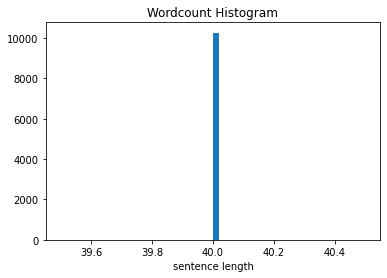

In [21]:
import matplotlib.pyplot as plt
plt.hist(statements_length, bins=50)
plt.gca().set(title='Wordcount Histogram', xlabel='sentence length');

In [22]:
x_train_glove=x_train_glove.reshape(x_train_glove.shape[0],8000)
x_val_glove=x_val_glove.reshape(x_val_glove.shape[0],8000)
x_test_glove=x_test_glove.reshape(x_test_glove.shape[0],8000)

In [24]:
x_train_glove = np.hstack((x_train_glove, x_train2))
x_val_glove = np.hstack((x_val_glove, x_val2))
x_test_glove = np.hstack((x_test_glove, x_test2))

In [25]:
x_train_glove.shape,x_val_glove.shape,x_test_glove.shape

((10269, 8005), (1284, 8005), (1283, 8005))

## Use of bert embeddings
note: we used our pre-processed code for bow which has the attributed appended to end the end of sentence. 

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

x_train_bert = np.hstack((model.encode(x_train), x_train2))
x_val_bert = np.hstack((model.encode(x_val), x_val2))
x_test_bert = np.hstack((model.encode(x_test), x_test2))

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Now use the above 3 types of embedded inputs(bow, glove, bert embeddings) for the 2 classification tasks and compare their outputs


In [ ]:
x_train_bert.shape

(10269, 389)

# Six-way classification

## Preprocessing

In [26]:
num_classes = 6
# Preprocessing function for the labels
def categorize(data):
    y = data["label"].tolist()

    # Encoding the Dependent Variable
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y)

    # Converting to binary class matrix
    y = np_utils.to_categorical(y, num_classes)
    return y

In [27]:
y_train_six_way = np.array(categorize(train))
y_test_six_way = np.array(categorize(test))
y_val_six_way = np.array(categorize(val))

In [28]:
y_train_six_way.shape

(10269, 6)

## Model

##Using Bag of words..!

In [ ]:
x_train_bow.shape

(10269, 8005)

In [ ]:
x_val_bow.shape

(1284, 8005)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=(8005), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2,mode="auto",verbose=1,restore_best_weights = True)
# callback1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,mode="auto",verbose=1,restore_best_weights = True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              8198144   
                                                                 
 dense_9 (Dense)             (None, 128)               131200    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 8,333,670
Trainable params: 8,333,670
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train_bow,y_train_six_way,batch_size = 64,epochs = 20,verbose = 1,callbacks = [callback],validation_data=(x_val_bow,y_val_six_way))
# history = model.fit(x_train_six_way, y_train_six_way, epochs=100, batch_size=64)

Epoch 1/20
161/161 [==============================] - 2s 12ms/step - loss: 0.1145 - accuracy: 0.9562 - val_loss: 5.6415 - val_accuracy: 0.3583
Epoch 2/20
161/161 [==============================] - 2s 12ms/step - loss: 0.1917 - accuracy: 0.9327 - val_loss: 4.2825 - val_accuracy: 0.3723
Epoch 3/20
161/161 [==============================] - 2s 15ms/step - loss: 0.1401 - accuracy: 0.9500 - val_loss: 4.2354 - val_accuracy: 0.3808
Epoch 4/20
161/161 [==============================] - 2s 12ms/step - loss: 0.1021 - accuracy: 0.9628 - val_loss: 4.2021 - val_accuracy: 0.3754
Epoch 5/20
161/161 [==============================] - 2s 11ms/step - loss: 0.0842 - accuracy: 0.9678 - val_loss: 4.7174 - val_accuracy: 0.3793
Epoch 5: early stopping


Build a model and pass bow, glove and bert embedded inputs: x_train_bow, x_train_glove, x_train_bert(similarly validate for val and report results on test)


In [ ]:
y_test_bow_six_p = model.predict(x_test_bow,batch_size=64)

In [ ]:
y_test_bow_six_pred = []
for r in y_test_bow_six_p:
  max_value = max(r)
  index = list(r).index(max_value)
  rr = [0]*6
  rr[index] = 1
  y_test_bow_six_pred.append(rr)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

print("Accuracy:" , accuracy_score(y_test_six_way, y_test_bow_six_pred))
print("F1-score:",f1_score(y_test_six_way,y_test_bow_six_pred,average=None))
multilabel_confusion_matrix(y_test_six_way, y_test_bow_six_pred)

Accuracy: 0.1363990646921278
F1-score: [0.15779817 0.23491379 0.01716738 0.09921671 0.         0.01818182]


array([[[ 781,  252],
        [ 207,   43]],

       [[ 464,  608],
        [ 102,  109]],

       [[1052,   17],
        [ 212,    2]],

       [[ 919,   97],
        [ 248,   19]],

       [[1026,    8],
        [ 249,    0]],

       [[1065,  126],
        [  90,    2]]])

In [ ]:
## write your code here
# Initialize hyperparameters
# Create model
# train
# test
# report accuracy, f1-score and confusion matrix

##Bert embeding..!

In [ ]:
!pip install tensorflow

In [32]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv1D,Dropout
from keras.layers.pooling import MaxPool1D
from keras.layers.recurrent import LSTM
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf


In [ ]:
def lstm_model(s):
  in_ = Input(shape=s)

  mid = Conv1D(64,8,padding = "same",activation="relu")(in_)
  mid = MaxPool1D(2)(mid)
  mid = Conv1D(64,8,padding = "same",activation="relu")(mid)
  mid = MaxPool1D(2)(mid)

  mid = LSTM(units=20)(mid)
  mid = Dropout(rate = 0.3)(mid)

  out_ = Dense(6,activation="softmax")(mid)

  lstm_model = Model(inputs = in_,outputs = out_)
  return lstm_model


In [36]:
callback_ = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3,verbose=1,restore_best_weights=True,)

In [ ]:
x_bert = np.expand_dims(x_train_bert, -1)
lstm_model_bert = lstm_model(x_bert.shape[1:])
lstm_model_bert.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
lstm_model_bert.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 389, 1)]          0         
                                                                 
 conv1d_19 (Conv1D)          (None, 389, 64)           576       
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 194, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 194, 64)           32832     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 97, 64)           0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 20)                6800

In [ ]:
x_bert.shape

(10269, 389, 1)

In [ ]:
history = lstm_model_bert.fit(x_bert, y_train_six_way, validation_data=(x_val_bert, y_val_six_way), epochs=20, batch_size=64, callbacks=[callback_])

Epoch 1/20
161/161 [==============================] - 140s 768ms/step - loss: 1.7223 - accuracy: 0.2717 - val_loss: 1.6403 - val_accuracy: 0.3318
Epoch 2/20
161/161 [==============================] - 128s 798ms/step - loss: 1.5653 - accuracy: 0.3859 - val_loss: 1.4305 - val_accuracy: 0.4478
Epoch 3/20
161/161 [==============================] - 128s 793ms/step - loss: 1.4265 - accuracy: 0.4313 - val_loss: 1.3420 - val_accuracy: 0.4634
Epoch 4/20
161/161 [==============================] - 127s 787ms/step - loss: 1.3673 - accuracy: 0.4368 - val_loss: 1.3265 - val_accuracy: 0.4470
Epoch 5/20
161/161 [==============================] - 126s 783ms/step - loss: 1.3457 - accuracy: 0.4456 - val_loss: 1.3136 - val_accuracy: 0.4509
Epoch 6/20
161/161 [==============================] - 128s 793ms/step - loss: 1.3328 - accuracy: 0.4468 - val_loss: 1.3087 - val_accuracy: 0.4579
Epoch 6: early stopping


In [ ]:
y_test_bert_six_p = lstm_model_bert.predict(x_test_bert,batch_size=64)

In [ ]:
y_test_bert_six_pred = []
for r in y_test_bert_six_p:
  max_value = max(r)
  index = list(r).index(max_value)
  rr = [0]*6
  rr[index] = 1
  y_test_bert_six_pred.append(rr)

In [ ]:
print("Accuracy:" , accuracy_score(y_test_six_way, y_test_bert_six_pred))
print("F1-score:",f1_score(y_test_six_way,y_test_bert_six_pred,average=None))
multilabel_confusion_matrix(y_test_six_way, y_test_bert_six_pred)

Accuracy: 0.18706157443491817
F1-score: [0.2244898  0.28994083 0.         0.         0.         0.        ]


array([[[ 935,   98],
        [ 206,   44]],

       [[ 127,  945],
        [  15,  196]],

       [[1069,    0],
        [ 214,    0]],

       [[1016,    0],
        [ 267,    0]],

       [[1034,    0],
        [ 249,    0]],

       [[1191,    0],
        [  92,    0]]])

##Glove embeding..!

In [29]:
def lstm_model_glove(s):
  in_ = Input(shape=s)

  mid = Conv1D(64,8,padding = "same",activation="relu")(in_)
  mid = MaxPool1D(2)(mid)
  mid = Conv1D(64,8,padding = "same",activation="relu")(mid)
  mid = MaxPool1D(2)(mid)

  mid = LSTM(units=64)(mid)
  mid = Dropout(rate = 0.3)(mid)

  out_ = Dense(6,activation="softmax")(mid)

  lstm_model = Model(inputs = in_,outputs = out_)
  return lstm_model


In [34]:
x_train_glove_.shape

(10269, 8005, 1)

In [33]:
x_train_glove_ = np.expand_dims(x_train_glove, -1)
lstm_model_glove = lstm_model_glove(x_train_glove_.shape[1:])
lstm_model_glove.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
lstm_model_glove.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8005, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 8005, 64)          576       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4002, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4002, 64)          32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2001, 64)         0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                33024 

In [37]:
his1 = lstm_model_glove.fit(x_train_glove_, y_train_six_way, validation_data=(x_val_glove, y_val_six_way), epochs=20, batch_size=64, callbacks=[callback_])

Epoch 1/20
161/161 [==============================] - 750s 5s/step - loss: 1.6972 - accuracy: 0.3049 - val_loss: 1.5596 - val_accuracy: 0.4540
Epoch 2/20
161/161 [==============================] - 748s 5s/step - loss: 1.4527 - accuracy: 0.4266 - val_loss: 1.3219 - val_accuracy: 0.4743
Epoch 3/20
161/161 [==============================] - 747s 5s/step - loss: 1.3383 - accuracy: 0.4477 - val_loss: 1.3119 - val_accuracy: 0.4696
Epoch 4/20
161/161 [==============================] - 747s 5s/step - loss: 1.3188 - accuracy: 0.4480 - val_loss: 1.3073 - val_accuracy: 0.4393
Epoch 5/20
161/161 [==============================] - 773s 5s/step - loss: 1.3037 - accuracy: 0.4528 - val_loss: 1.3081 - val_accuracy: 0.4618
Epoch 5: early stopping


In [38]:
y_test_glove_six_p = lstm_model_glove.predict(x_test_glove,batch_size=64)

In [39]:
y_test_glove_six_pred = []
for r in y_test_glove_six_p:
  max_value = max(r)
  index = list(r).index(max_value)
  rr = [0]*6
  rr[index] = 1
  y_test_glove_six_pred.append(rr)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

print("Accuracy:" , accuracy_score(y_test_six_way, y_test_glove_six_pred))
print("F1-score:",f1_score(y_test_six_way,y_test_glove_six_pred,average=None))
multilabel_confusion_matrix(y_test_six_way, y_test_glove_six_pred)

Accuracy: 0.45362431800467656
F1-score: [0.47811448 0.26720648 0.43767313 0.48445596 0.44705882 0.5508982 ]


array([[[ 831,  202],
        [ 108,  142]],

       [[1069,    3],
        [ 178,   33]],

       [[1001,   68],
        [ 135,   79]],

       [[ 698,  318],
        [  80,  187]],

       [[ 953,   81],
        [ 154,   95]],

       [[1162,   29],
        [  46,   46]]])

# Binary Classification

## Preprocessing

In [42]:
num_classes = 2

In [43]:
# Function for preprocessing labels
def dataPreprocessingBinary(data):
    y = data["label"].tolist()

    # Changing the 'half-true', 'mostly-true', barely-true', 'pants-fire' labels to True/False for Binary Classification
    for x in range(len(y)):
        if(y[x] == 'half-true'):
            y[x] = 'True'
        elif(y[x] == 'mostly-true'):
            y[x] = 'True'
        elif(y[x] == 'barely-true'):
            y[x] = 'False'
        elif(y[x] == 'pants-fire'):
            y[x] = 'False'

    # Converting the lables into binary class matrix
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y)
    y = np_utils.to_categorical(y, num_classes)
    return y

In [44]:
y_train_binary = dataPreprocessingBinary(train)
y_test_binary = dataPreprocessingBinary(test)
y_val_binary = dataPreprocessingBinary(val)

In [45]:
y_train_binary.shape

(10269, 2)

## Model
Build a model and pass bow, glove and bert embedded inputs: x_train_bow, x_train_glove, x_train_bert(similarly validate for val and report results on test)


###Bag of Words..!

In [ ]:
model_bow = Sequential()
model_bow.add(Dense(1024, input_dim=(8005), activation='relu'))
model_bow.add(Dense(128, activation='relu'))
model_bow.add(Dense(32, activation='relu'))
model_bow.add(Dense(2, activation='softmax'))
model_bow.summary()
model_bow.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2,mode="auto",verbose=1,restore_best_weights = True)
# callback1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,mode="auto",verbose=1,restore_best_weights = True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1024)              8198144   
                                                                 
 dense_17 (Dense)            (None, 128)               131200    
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8,333,538
Trainable params: 8,333,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_bow.fit(x_train_bow,y_train_binary,batch_size = 64,epochs = 20,verbose = 1,callbacks = [],validation_data=(x_val_bow,y_val_binary))

Epoch 1/20
161/161 [==============================] - 3s 20ms/step - loss: 0.3173 - accuracy: 0.8435 - val_loss: 0.7689 - val_accuracy: 0.6970
Epoch 2/20
161/161 [==============================] - 3s 16ms/step - loss: 0.2251 - accuracy: 0.8937 - val_loss: 0.9692 - val_accuracy: 0.6822
Epoch 3/20
161/161 [==============================] - 3s 19ms/step - loss: 0.1655 - accuracy: 0.9232 - val_loss: 1.1514 - val_accuracy: 0.6893
Epoch 4/20
161/161 [==============================] - 2s 15ms/step - loss: 0.1387 - accuracy: 0.9365 - val_loss: 1.4500 - val_accuracy: 0.6791
Epoch 5/20
161/161 [==============================] - 2s 12ms/step - loss: 0.1322 - accuracy: 0.9442 - val_loss: 1.2944 - val_accuracy: 0.6877
Epoch 6/20
161/161 [==============================] - 2s 12ms/step - loss: 0.1013 - accuracy: 0.9563 - val_loss: 1.4390 - val_accuracy: 0.6970
Epoch 7/20
161/161 [==============================] - 2s 12ms/step - loss: 0.0824 - accuracy: 0.9623 - val_loss: 1.6602 - val_accuracy: 0.6822

In [ ]:
y_test_bow_p = model_bow.predict(x_test_bow,batch_size=64)
y_test_bow_predict = []
for p in y_test_bow_p:
  if p[0] > p[1]:
    y_test_bow_predict.append([1,0])
  else:
    y_test_bow_predict.append([0,1])    

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

print("Accuracy:" , accuracy_score(y_test_binary, y_test_bow_predict))
print("F1-score:",f1_score(y_test_binary,y_test_bow_predict,average=None))
multilabel_confusion_matrix(y_test_binary, y_test_bow_predict)

Accuracy: 0.6749805144193297
F1-score: [0.60473934 0.72402383]


array([[[547, 180],
        [237, 319]],

       [[319, 237],
        [180, 547]]])

###Bert Embeding..!

In [ ]:
def lstm_model_binary(s):
  in_ = Input(shape=s)

  mid = Conv1D(64,8,padding = "same",activation="relu")(in_)
  mid = MaxPool1D(2)(mid)
  mid = Conv1D(64,8,padding = "same",activation="relu")(mid)
  mid = MaxPool1D(2)(mid)

  mid = LSTM(units=20)(mid)
  mid = Dropout(rate = 0.3)(mid)

  out_ = Dense(2,activation="softmax")(mid)

  lstm_model = Model(inputs = in_,outputs = out_)
  return lstm_model


In [ ]:
callback_binary = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3,verbose=1,restore_best_weights=True,)
x_bert = np.expand_dims(x_train_bert, -1)
lstm_model_bert_binary = lstm_model_binary(x_bert.shape[1:])
lstm_model_bert_binary.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
lstm_model_bert_binary.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 389, 1)]          0         
                                                                 
 conv1d_23 (Conv1D)          (None, 389, 64)           576       
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 194, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_24 (Conv1D)          (None, 194, 64)           32832     
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 97, 64)           0         
 g1D)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 20)                680

In [ ]:
history_bert_binary = lstm_model_bert_binary.fit(x_bert, y_train_binary, validation_data=(x_val_bert, y_val_binary), epochs=20, batch_size=64, callbacks=[callback_binary])

Epoch 1/20
161/161 [==============================] - 121s 750ms/step - loss: 0.5722 - accuracy: 0.7043 - val_loss: 0.5261 - val_accuracy: 0.7142
Epoch 2/20
161/161 [==============================] - 118s 734ms/step - loss: 0.5218 - accuracy: 0.7275 - val_loss: 0.5112 - val_accuracy: 0.7204
Epoch 3/20
161/161 [==============================] - 119s 739ms/step - loss: 0.5113 - accuracy: 0.7305 - val_loss: 0.4991 - val_accuracy: 0.7095
Epoch 4/20
161/161 [==============================] - 118s 734ms/step - loss: 0.5080 - accuracy: 0.7295 - val_loss: 0.4990 - val_accuracy: 0.7204
Epoch 5/20
161/161 [==============================] - 120s 743ms/step - loss: 0.5082 - accuracy: 0.7269 - val_loss: 0.5062 - val_accuracy: 0.7103
Epoch 5: early stopping


In [ ]:
y_test_bert_p_binary = lstm_model_bert_binary.predict(x_test_bert,batch_size=64)
y_test_bert_predict_binary = []
for p in y_test_bow_p:
  if p[0] > p[1]:
    y_test_bert_predict_binary.append([1,0])
  else:
    y_test_bert_predict_binary.append([0,1])    

In [ ]:
print("Accuracy:" , accuracy_score(y_test_binary, y_test_bert_predict_binary))
print("F1-score:",f1_score(y_test_binary,y_test_bert_predict_binary,average=None))
multilabel_confusion_matrix(y_test_binary, y_test_bert_predict_binary)

Accuracy: 0.6749805144193297
F1-score: [0.60473934 0.72402383]


array([[[547, 180],
        [237, 319]],

       [[319, 237],
        [180, 547]]])

In [ ]:
## write your code here
# Initialize hyperparameters
# Create model
# train
# test
# report accuracy, f1-score and confusion matrix

###Glove Embeding..!

In [46]:
def lstm_model_binary_glove(s):
  in_ = Input(shape=s)

  mid = Conv1D(64,8,padding = "same",activation="relu")(in_)
  mid = MaxPool1D(2)(mid)
  mid = Conv1D(64,8,padding = "same",activation="relu")(mid)
  mid = MaxPool1D(2)(mid)

  mid = LSTM(units=64)(mid)
  mid = Dropout(rate = 0.3)(mid)

  out_ = Dense(2,activation="softmax")(mid)

  lstm_model = Model(inputs = in_,outputs = out_)
  return lstm_model

In [47]:
callback_binary = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3,verbose=1,restore_best_weights=True,)
lstm_model_glove_binary = lstm_model_binary_glove(x_train_glove_.shape[1:])
lstm_model_glove_binary.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
lstm_model_glove_binary.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8005, 1)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 8005, 64)          576       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4002, 64)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 4002, 64)          32832     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2001, 64)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 64)                3302

In [ ]:
history_glove_binary = lstm_model_glove_binary.fit(x_train_glove_, y_train_binary, validation_data=(x_val_glove, y_val_binary), epochs=20, batch_size=64, callbacks=[callback_binary])

Epoch 1/20
161/161 [==============================] - 850s 5s/step - loss: 0.6178 - accuracy: 0.6677 - val_loss: 0.5454 - val_accuracy: 0.7173
Epoch 2/20
161/161 [==============================] - 819s 5s/step - loss: 0.5293 - accuracy: 0.7258 - val_loss: 0.5110 - val_accuracy: 0.7212
Epoch 3/20
161/161 [==============================] - 777s 5s/step - loss: 0.5126 - accuracy: 0.7284 - val_loss: 0.5056 - val_accuracy: 0.7251
Epoch 4/20
 29/161 [====>.........................] - ETA: 10:23 - loss: 0.5054 - accuracy: 0.7258

In [ ]:
y_test_glove_p_binary = lstm_model_glove_binary.predict(x_test_bert,batch_size=64)
y_test_glove_predict_binary = []
for p in y_test_bow_p:
  if p[0] > p[1]:
    y_test_glove_predict_binary.append([1,0])
  else:
    y_test_glove_predict_binary.append([0,1])    

In [ ]:
print("Accuracy:" , accuracy_score(y_test_binary, y_test_glove_predict_binary))
print("F1-score:",f1_score(y_test_binary,y_test_glove_predict_binary,average=None))
multilabel_confusion_matrix(y_test_binary, y_test_glove_predict_binary)